# Surface vertex classification

In this notebook we demonstrate how to retrieve surface/vertex measurements to classify vertices on the surface. The used example data is a derived from of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode). See the [creating_surfaces](creating_surfaces.ipynb) for how to create the surface from raw imaging data.

See also
* [vedo library](https://vedo.embl.es/)
* [vedo add curvature documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html?highlight=curvature#vedo.mesh.Mesh.addCurvatureScalars)

In [1]:
import napari
import apoc
import numpy as np
import vedo
import napari_process_points_and_surfaces as nppas

We will be working with a simple geometry (i.e., an ellipsoid) to demonstrate the curvature property and the different settings.

In [2]:
mesh = vedo.load("gastruloid.ply")
surface = nppas.to_napari_surface_data(mesh)
len(surface[0])

249178

In [3]:
simplified = nppas.decimate_quadric(surface, fraction=0.02)
len(simplified[0])

4992

## Surface visualization
The surface itself does not come with any quantification. It looks like this:

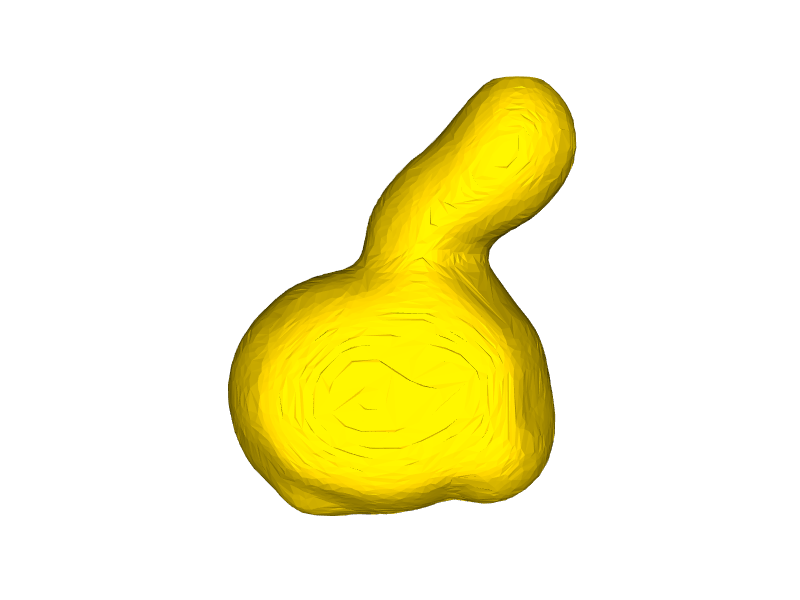

In [4]:
nppas.show(simplified, azimuth=-90)

## Quantification
We can create a table ([pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) like this.

In [5]:
requested_measurements = [nppas.Quality.AREA, 
                          nppas.Quality.ASPECT_RATIO,
                          nppas.Quality.GAUSS_CURVATURE, 
                          nppas.Quality.MEAN_CURVATURE,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_1_PERCENT,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_2_PERCENT,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_5_PERCENT,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_10_PERCENT,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_25_PERCENT,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_50_PERCENT]

df = nppas.surface_quality_table(simplified, requested_measurements)
df

,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_1_PERCENT,Quality.SPHERE_FITTED_CURVATURE_2_PERCENT,Quality.SPHERE_FITTED_CURVATURE_5_PERCENT,Quality.SPHERE_FITTED_CURVATURE_10_PERCENT,Quality.SPHERE_FITTED_CURVATURE_25_PERCENT,Quality.SPHERE_FITTED_CURVATURE_50_PERCENT
0,0,44.274965,2.636818,-0.005313,-7.176969e-04,NaN,NaN,NaN,0.011709,0.000047,0.000019
1,1,59.073253,2.690561,-0.032388,-1.398520e-03,NaN,NaN,NaN,0.003611,0.000052,0.000021
2,2,31.471638,3.009504,0.152274,4.371158e-03,NaN,NaN,NaN,0.003611,0.000052,0.000019
3,3,29.062228,6.098443,0.114832,-1.377606e-03,NaN,NaN,NaN,0.005965,0.000030,0.000020
4,4,72.722502,9.398059,0.018914,-6.725527e-07,NaN,NaN,NaN,NaN,0.000066,0.000017
...,...,...,...,...,...,...,...,...,...,...,...
4987,4987,42.260907,2.356784,0.002855,6.997316e-02,NaN,NaN,NaN,0.000036,0.000092,0.000071
4988,4988,49.376971,1.656458,0.000781,4.326996e-02,NaN,NaN,NaN,NaN,0.000077,0.000085
4989,4989,23.001575,1.986546,0.008730,1.192971e-01,NaN,NaN,NaN,0.012559,0.000037,0.000080
4990,4990,42.464066,1.887509,0.005780,6.098456e-02,NaN,NaN,NaN,0.008372,0.000138,0.000087


To get an overview about measurements, we can summarize them:

In [6]:
df.describe()

,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_1_PERCENT,Quality.SPHERE_FITTED_CURVATURE_2_PERCENT,Quality.SPHERE_FITTED_CURVATURE_5_PERCENT,Quality.SPHERE_FITTED_CURVATURE_10_PERCENT,Quality.SPHERE_FITTED_CURVATURE_25_PERCENT,Quality.SPHERE_FITTED_CURVATURE_50_PERCENT
count,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,0.0,0.0,2.999000e+03,4971.000000,4992.000000,4992.000000
mean,2495.500000,16.829058,2.290597,0.015152,0.000811,NaN,NaN,3.407332e-03,0.001884,0.000608,0.000303
std,1441.210602,7.604174,1.427905,0.056833,0.010941,NaN,NaN,9.935467e-03,0.003312,0.000614,0.000162
min,0.000000,6.841043,1.115018,-1.059174,-0.048056,NaN,NaN,2.354565e-10,0.000003,0.000028,0.000015
25%,1247.750000,12.406583,1.592467,0.000410,-0.000155,NaN,NaN,1.558178e-04,0.000316,0.000198,0.000158
50%,2495.500000,15.103493,1.946248,0.011194,0.000015,NaN,NaN,5.479448e-04,0.000604,0.000380,0.000244
75%,3743.250000,18.843901,2.578461,0.023165,0.000289,NaN,NaN,1.582323e-03,0.001465,0.000692,0.000457
max,4991.000000,134.592366,44.518758,0.767456,0.362894,NaN,NaN,1.195302e-01,0.036119,0.002550,0.000607


From that table, we can extract a single column as list.

In [7]:
sp_curvature = list(df['Quality.SPHERE_FITTED_CURVATURE_10_PERCENT'])
sp_curvature[:5]

[0.011708951126017135,
 0.003610549954137812,
 0.003610549954137812,
 0.005964894326307577,
 nan]

## Visualizing measurements
To visualize the measurements, we need to attach them to the surface:

In [8]:
quantified_surface = nppas.set_vertex_values(simplified, sp_curvature)

The visualization can be customized as well, e.g. by changing the view angle and the colormap.

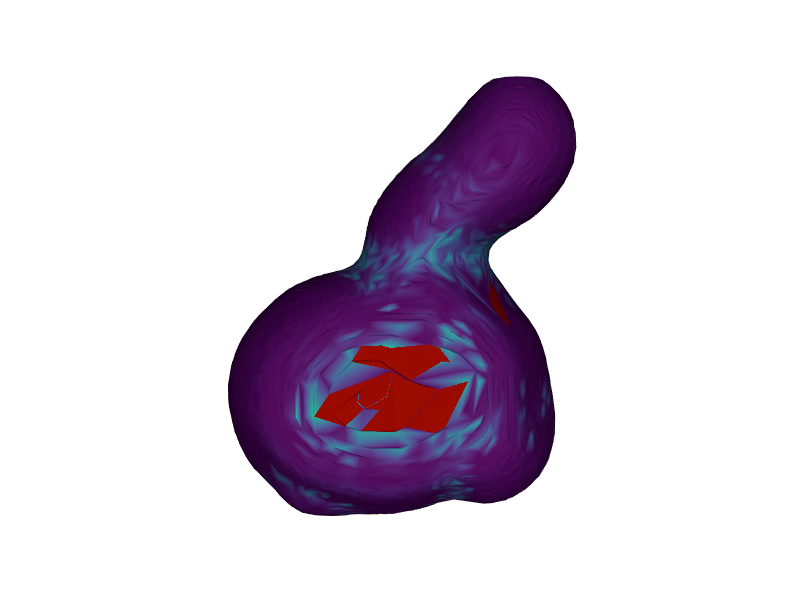

In [9]:
nppas.show(quantified_surface, azimuth=-90)

In [10]:
viewer = napari.Viewer(ndisplay=3)
viewer.camera.angles = (40, -30, 55)

In [11]:
surface_layer = viewer.add_surface(simplified)

In [12]:
surface_layer.properties = df.to_dict(orient='list')
surface_layer.features = df

In [13]:
from napari_skimage_regionprops import add_table
add_table(surface_layer, viewer)

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


In [14]:
viewer.window.add_dock_widget(nppas.SurfaceAnnotationWidget(viewer))

# Manual annotation
Use the napari window and the Surface Annotation Widget to draw with value 2 and 3 in concave and convex region on the surface.

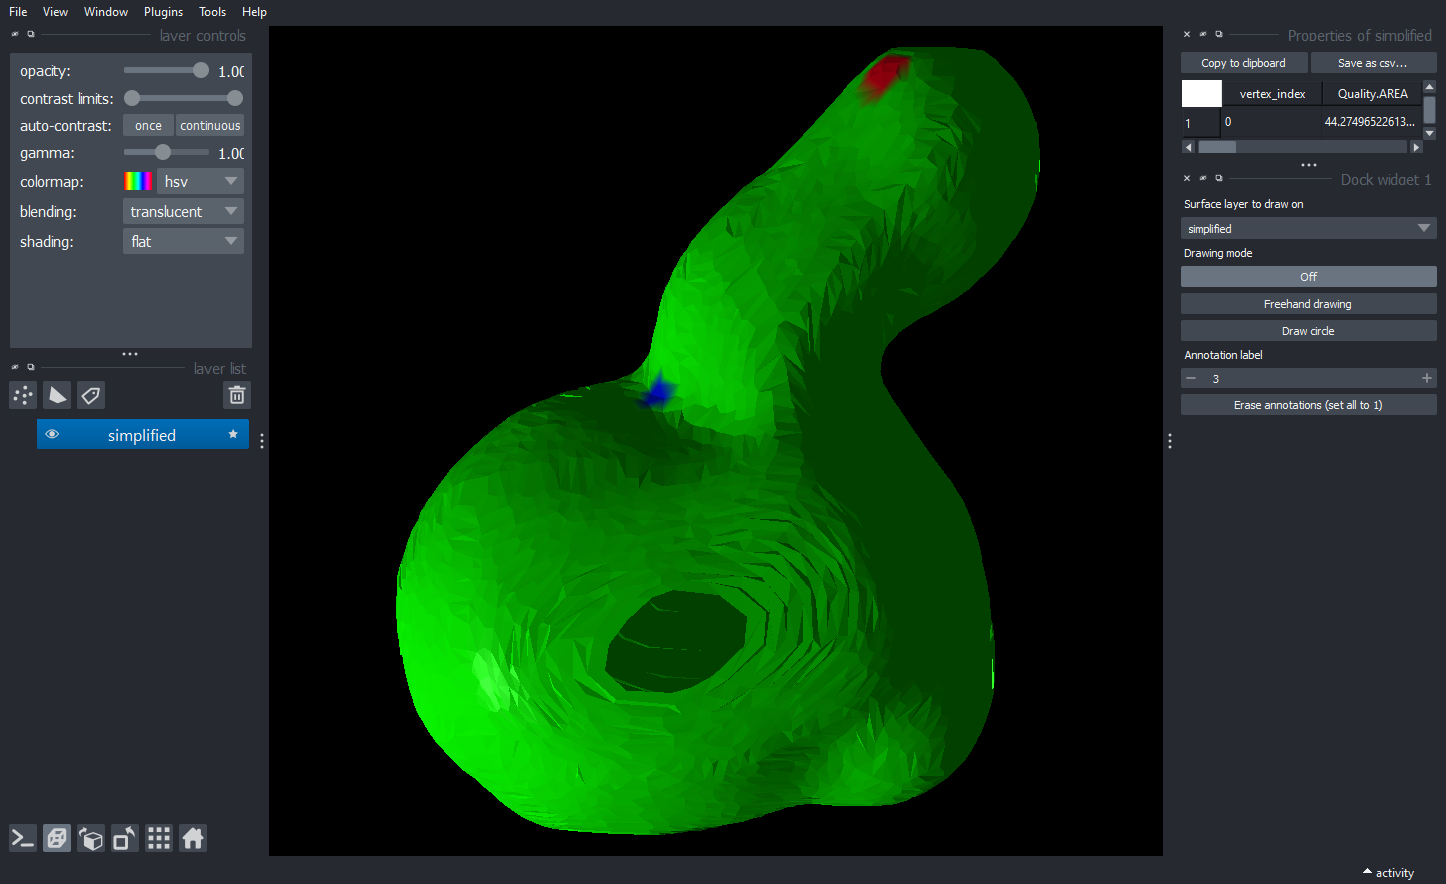

In [15]:
napari.utils.nbscreenshot(viewer)

In [16]:
from napari_accelerated_pixel_and_object_classification._surface_vertex_classifier import SurfaceVertexClassifierWidget
viewer.window.add_dock_widget(SurfaceVertexClassifierWidget(viewer))

Selected surface layer: simplified
Selected measurements: ['Quality.AREA', 'Quality.ASPECT_RATIO', 'Quality.GAUSS_CURVATURE', 'Quality.MEAN_CURVATURE', 'Quality.SPHERE_FITTED_CURVATURE_25_PERCENT', 'Quality.SPHERE_FITTED_CURVATURE_50_PERCENT', 'Quality.SPHERE_FITTED_CURVATURE_10_PERCENT']
selected properties       Quality.AREA  Quality.ASPECT_RATIO  Quality.GAUSS_CURVATURE  \
0        44.274965              2.636818                -0.005313   
1        59.073253              2.690561                -0.032388   
2        31.471638              3.009504                 0.152274   
3        29.062228              6.098443                 0.114832   
4        72.722502              9.398059                 0.018914   
...            ...                   ...                      ...   
4987     42.260907              2.356784                 0.002855   
4988     49.376971              1.656458                 0.000781   
4989     23.001575              1.986546                 0.008730   


# Train classifier
Next, we can use the Surface Vertex Classification widget to train a classifier.

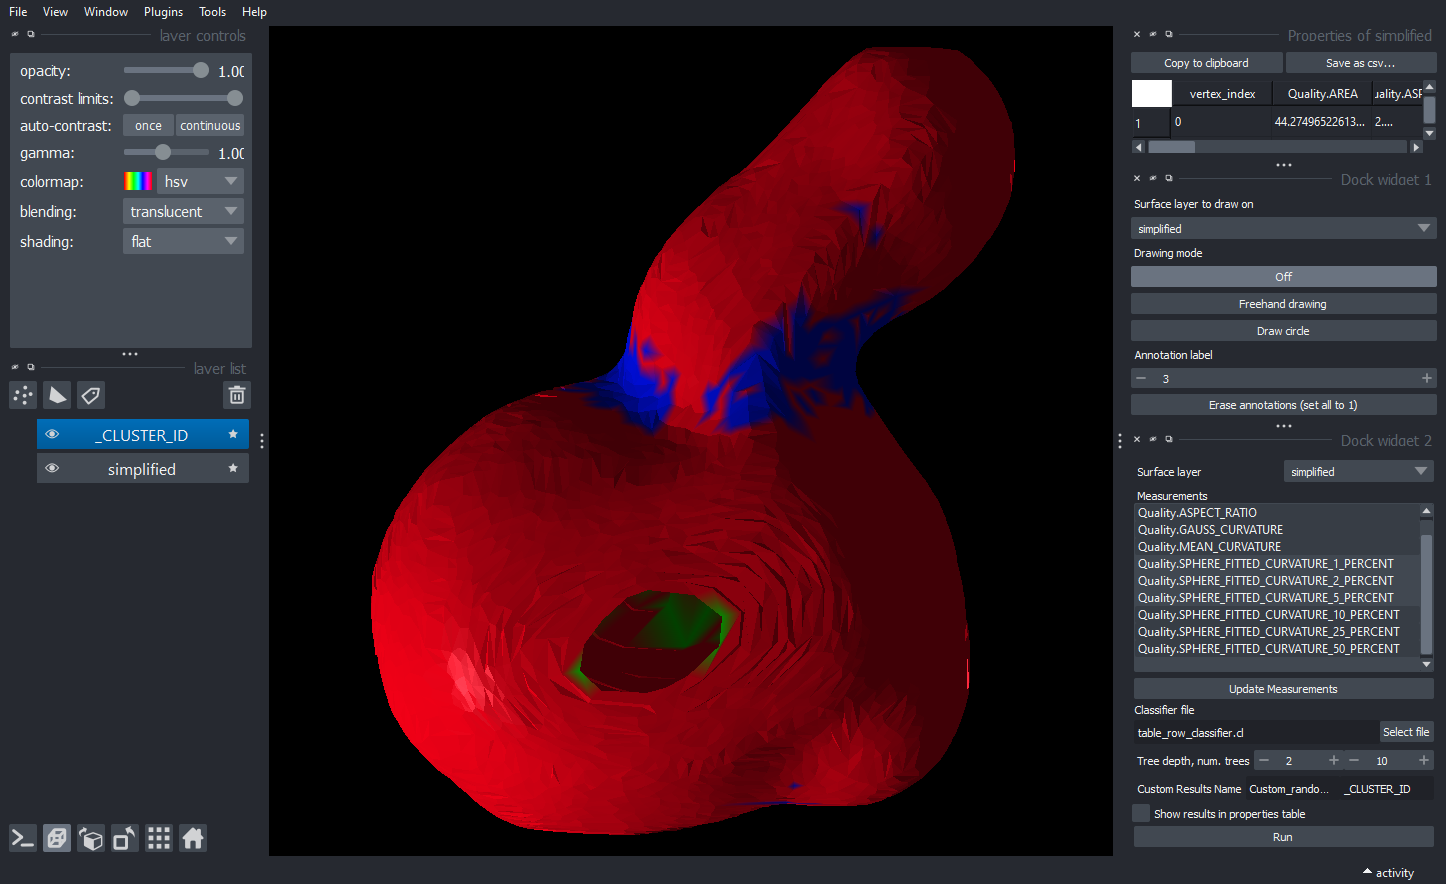

In [17]:
napari.utils.nbscreenshot(viewer)

## Apply classifier

The classifier is an [apoc](https://github.com/haesleinhuepf/apoc) TableRowClassifier, which can be applied to the table/DataFrame above.

In [18]:
table_row_classifier = apoc.TableRowClassifier(opencl_filename='table_row_classifier.cl')

In [19]:
result = table_row_classifier.predict(df)

In [20]:
result

array([2, 2, 2, ..., 2, 2, 2], dtype=uint32)

In [21]:
df['classification'] = result
df

,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_1_PERCENT,Quality.SPHERE_FITTED_CURVATURE_2_PERCENT,Quality.SPHERE_FITTED_CURVATURE_5_PERCENT,Quality.SPHERE_FITTED_CURVATURE_10_PERCENT,Quality.SPHERE_FITTED_CURVATURE_25_PERCENT,Quality.SPHERE_FITTED_CURVATURE_50_PERCENT,_CLUSTER_ID,classification
0,0,44.274965,2.636818,-0.005313,-7.176969e-04,NaN,NaN,NaN,0.011709,0.000047,0.000019,3.0,2
1,1,59.073253,2.690561,-0.032388,-1.398520e-03,NaN,NaN,NaN,0.003611,0.000052,0.000021,3.0,2
2,2,31.471638,3.009504,0.152274,4.371158e-03,NaN,NaN,NaN,0.003611,0.000052,0.000019,3.0,2
3,3,29.062228,6.098443,0.114832,-1.377606e-03,NaN,NaN,NaN,0.005965,0.000030,0.000020,3.0,2
4,4,72.722502,9.398059,0.018914,-6.725527e-07,NaN,NaN,NaN,NaN,0.000066,0.000017,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,4987,42.260907,2.356784,0.002855,6.997316e-02,NaN,NaN,NaN,0.000036,0.000092,0.000071,3.0,2
4988,4988,49.376971,1.656458,0.000781,4.326996e-02,NaN,NaN,NaN,NaN,0.000077,0.000085,1.0,0
4989,4989,23.001575,1.986546,0.008730,1.192971e-01,NaN,NaN,NaN,0.012559,0.000037,0.000080,3.0,2
4990,4990,42.464066,1.887509,0.005780,6.098456e-02,NaN,NaN,NaN,0.008372,0.000138,0.000087,3.0,2


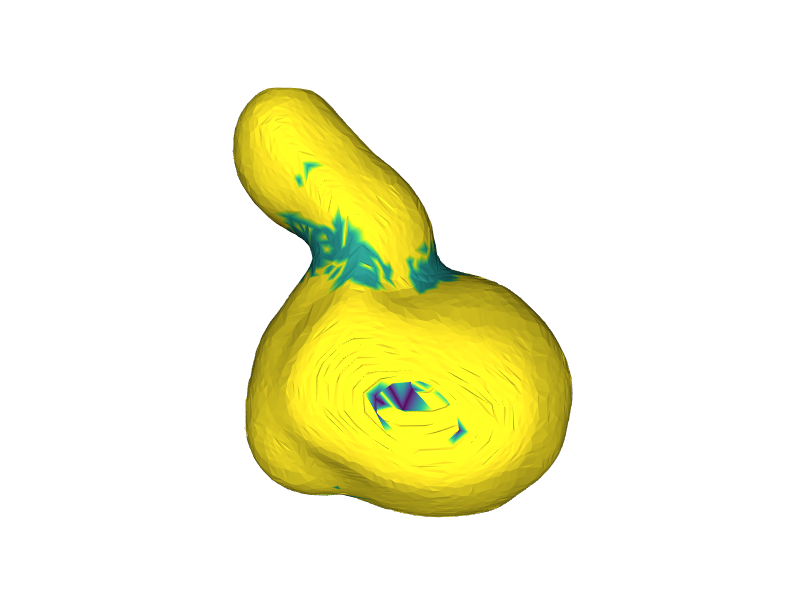

In [22]:
annotated_surface = nppas.set_vertex_values(simplified, result)
nppas.show(annotated_surface, azimuth=90)